In [16]:
from pykrige.rk import RegressionKriging
import matplotlib.pyplot as plt
import numpy as np

import pykrige.kriging_tools as kt
import geopandas as gpd
import contextily as cx
import pandas as pd

from sklearn.model_selection import train_test_split

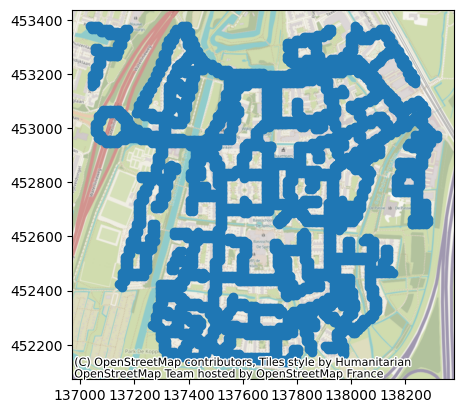

In [3]:
gdf = gpd.read_file('..\\output\\model_in1.GEOJSON', engine='pyogrio')
c_variables = ['x', 'y']
# x_variables = ['maxspeed', 'bridge', 'rt_tertiary', 'rt_residential', 'rt_living_street', 'rt_service']
x_variables = ['maxspeed', 'bridge']
y_variable = ['dBA_reg']
ax = gdf.plot()
cx.add_basemap(ax, crs=gdf.crs)


In [7]:
gdf_train, gdf_test = train_test_split(gdf[gdf['dBA_reg'].notna()], test_size=0.2)
gdf_unknown = gdf[gdf['dBA_reg'].isna()]

In [33]:
for col in x_variables+y_variable+c_variables:
    gdf_train[col] = pd.to_numeric(gdf_train[col])
# gdf_train = gdf_train.astype('int64')
x = gdf_train[x_variables].values
y = gdf_train[y_variable].values.flatten()
c = gdf_train[c_variables].values
x

array([[50, False],
       [50, False],
       [50, False],
       [15, False],
       [30, False],
       [50, False],
       [15, False],
       [50, False],
       [50, True],
       [30, False],
       [15, False],
       [30, False],
       [50, False],
       [50, True],
       [15, False],
       [30, False],
       [50, False],
       [50, True],
       [50, False],
       [50, False],
       [50, False],
       [15, False],
       [50, True],
       [50, False],
       [50, False],
       [50, True],
       [50, False],
       [50, False],
       [50, True],
       [50, False],
       [50, False],
       [50, False],
       [50, False],
       [30, False],
       [15, False],
       [50, False],
       [50, False],
       [50, False],
       [50, False],
       [50, False],
       [50, True],
       [30, False],
       [50, False],
       [50, False],
       [30, False],
       [50, False],
       [30, False],
       [50, False],
       [50, False],
       [50, False],
       

In [34]:
rk = RegressionKriging()
print(type(x), type(c), type(y))
rk.fit(x,c,y)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Finished learning regression model
Finished kriging residuals


In [35]:
x_test = gdf_test[x_variables].values
y_test = gdf_test[y_variable].values.flatten()
c_test = gdf_test[c_variables].values

print("Regression Score: ", rk.regression_model.score(x_test, y_test))
print("RK score: ", rk.score(x_test, c_test, y_test))

Regression Score:  0.45971067467198123
RK score:  0.6319095580524063


In [23]:
import sys

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from pykrige.rk import RegressionKriging

svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(copy_X=True, fit_intercept=False)

models = [svr_model, rf_model, lr_model]

try:
    housing = fetch_california_housing()
except PermissionError:
    # this dataset can occasionally fail to download on Windows
    sys.exit(0)

# take the first 5000 as Kriging is memory intensive
p = housing["data"][:5000, :-2]
x = housing["data"][:5000, -2:]
target = housing["target"][:5000]

p_train, p_test, x_train, x_test, target_train, target_test = train_test_split(
    p, x, target, test_size=0.3, random_state=42
)

for m in models:
    print("=" * 40)
    print("regression model:", m.__class__.__name__)
    m_rk = RegressionKriging(regression_model=m, n_closest_points=10)
    m_rk.fit(p_train, x_train, target_train)
    print("Regression Score: ", m_rk.regression_model.score(p_test, target_test))
    print("RK score: ", m_rk.score(p_test, x_test, target_test))

regression model: SVR
Finished learning regression model
Finished kriging residuals
Regression Score:  -0.03405385545698292
RK score:  0.6706182225388981
regression model: RandomForestRegressor
Finished learning regression model
Finished kriging residuals
Regression Score:  0.7021515116658092
RK score:  0.7401308695065281
regression model: LinearRegression
Finished learning regression model
Finished kriging residuals
Regression Score:  0.5277968398381674
RK score:  0.6036605153133718


In [29]:
x_train

array([[  37.91, -122.29],
       [  36.76, -119.72],
       [  34.09, -118.2 ],
       ...,
       [  35.64, -118.47],
       [  34.15, -118.42],
       [  37.58, -121.96]])